# Is Home Advantage Real?
### Let's look at the statistics

https://www.kaggle.com/drgilermo/exploration-of-home-advantage-and-its-causes

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

Countries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/Country_facts.csv")
NBA = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/NBA.csv", encoding = "ISO-8859-1") 
Soccer = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SoccerLEagues.csv", encoding = "ISO-8859-1")

# Let's start with the NBA
Let's produce a scatter plot of the away winning percentage vs the home winning percentage. the further below the diagonal line the points are, the more significant the home advantage is.



Text(0.5, 1.0, 'Home vs Away PCT in the NBA')

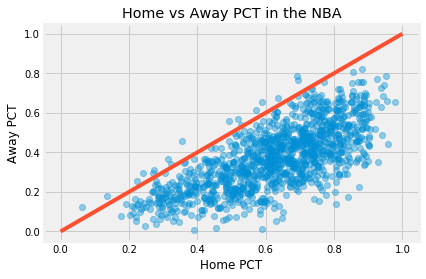

In [2]:
plt.plot(NBA.HomePCT + np.random.normal(0,0.01,len(NBA)),NBA.AwayPCT + np.random.normal(0,0.01,len(NBA)),'o', alpha = 0.4)
plt.plot([0,1],[0,1])
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in the NBA')

## So, of 1216 NBA teams over the last 50 years, only 16 teams performed away better than at home.

# Now let's explore Soccer a bit

In [0]:
Soccer['HomePCT'] = np.true_divide(Soccer['HomeWins'],Soccer['HomeWins'] + Soccer['HomeLoss'] + Soccer['HomeDraw'])
Soccer['AwayPCT'] = np.true_divide(Soccer['AwayWins'],Soccer['AwayWins'] + Soccer['AwayLoss'] + Soccer['AwayDraw'])

(0, 1)

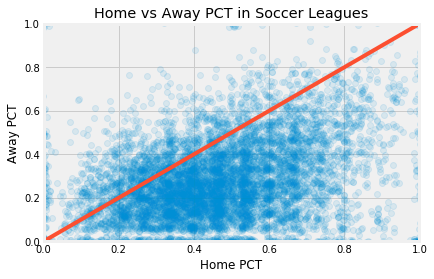

In [4]:
plt.plot(Soccer.HomePCT + np.random.normal(0,0.01,len(Soccer)),Soccer.AwayPCT + np.random.normal(0,0.01,len(Soccer)),'o', alpha = 0.1)
plt.plot([0,1],[0,1])
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in Soccer Leagues')
plt.xlim([0,1])
plt.ylim([0,1])

### The home advantage is very noticeable in soccer too.

However, not as much as in the NBA. about 15% of the teams had a higher winning percent away than at home.

This can be (and probably is) due to the fact that a NBA season is 82 games long, which makes it less likely for a team to keep this anomaly consistently over a full year.

# So - in which sport the home advantage is more significant?

Let's define the home factor as following: **(Home PCT - Away PCT)/(Home PCT + Away PCT)**

The values would range from -1 to 1, where 1 implies maximal home advantage, and the opposite for -1.

In [0]:
NBA['Home_Factor'] = np.true_divide((NBA.HomePCT - NBA.AwayPCT),(NBA.HomePCT + NBA.AwayPCT))
Soccer['Home_Factor'] = np.true_divide((Soccer.HomePCT - Soccer.AwayPCT),(Soccer.HomePCT + Soccer.AwayPCT))

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0, 'Home Factor')

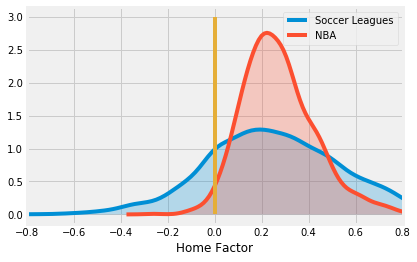

In [6]:
import seaborn as sns

sns.kdeplot(Soccer.Home_Factor, shade = True)
sns.kdeplot(NBA.Home_Factor, shade = True)
plt.xlim([-0.8,0.8])
plt.legend(['Soccer Leagues','NBA'])
plt.plot([0,0],[0,3])
plt.xlabel('Home Factor')

# Analysis

While the soccer histogram is wider - again probably due to the fact the soccer seasons are much shorter, allowing for more statistical out-liars (as well as single soccer matches who are arguably more random) - the mean is effectively the same!

This is a bit weird. If home advantage depends on things like referees, long bus rides, hostile audience, etc., I would except the home advantage to behave very differently in American Basketball and worldwide soccer. but it doesn't implying that the home advantage may stem from deeper and more basic human behavior.

# Let's see how the goals difference changes between home and away

Text(0, 0.5, 'Away Goals Difference')

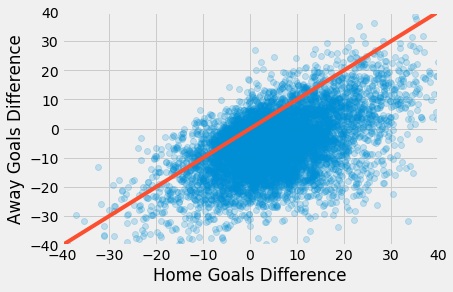

In [7]:
plt.style.use('fivethirtyeight')
plt.plot(Soccer.HomeRatio + np.random.normal(0,0.5,len(Soccer)),Soccer.AwayGoalsDiff+ np.random.normal(0,0.5,len(Soccer)),'o', alpha = 0.2)
plt.plot([-100,80],[-100,80])
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.xlabel('Home Goals Difference')
plt.ylabel('Away Goals Difference')

# Has the effect changed over time?

Since we have NBA data for a few decades, let see if it has developed over time

(1950, 2010)

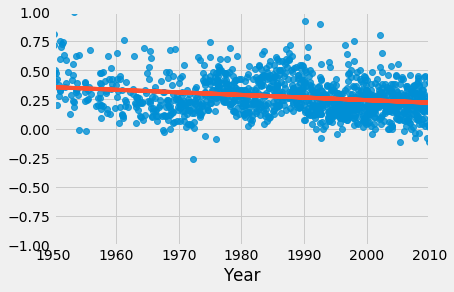

In [8]:
plt.plot(NBA.Year + np.random.normal(0,0.5,len(NBA)),NBA.Home_Factor,'o', alpha = 0.8)
x = NBA.Year
y = NBA.Home_Factor
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.xlabel('Year')
plt.ylim([-1,1])
plt.xlim([1950,2010])

It seems like there's a modest decline in home advantage in the last decades

Let's see what other factors can affect this phenomenon. It is conventional wisdom that one of the causes is the home crowd who pushes the home team and frighting or annoying the away team, but is it really the case? it is difficult to test it since we don't have the crowd size in each and every game, but we due have the average league attendance.

Text(0.5, 0, 'Average Attandance per game in the league')

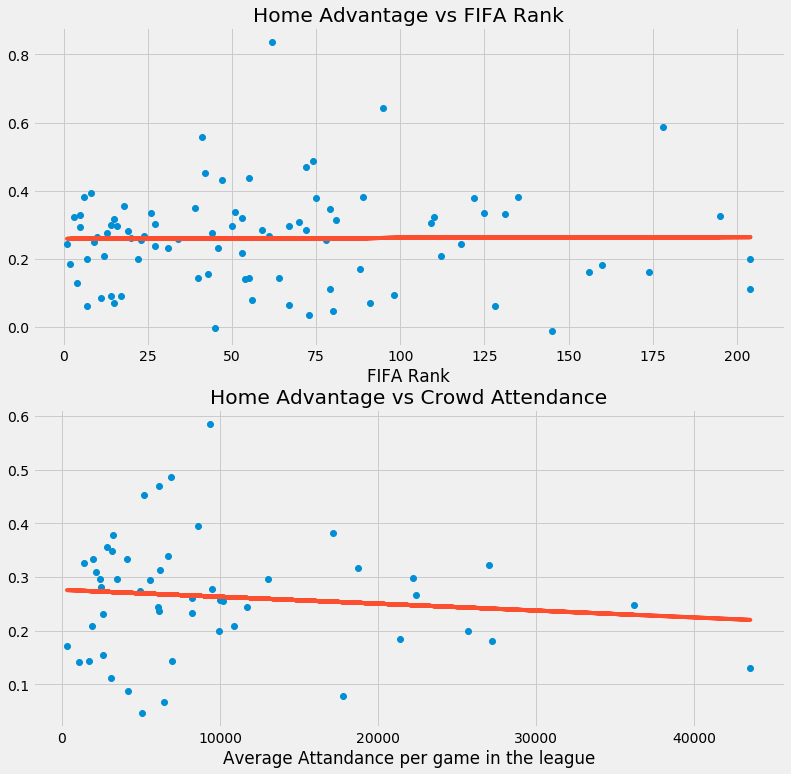

In [10]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.title('Home Advantage vs FIFA Rank')
plt.plot(Countries.FIFA_Rank, Countries.Home_Away_Contrast,'o')
x = Countries.FIFA_Rank
y = Countries.Home_Away_Contrast
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.xlabel('FIFA Rank')

plt.subplot(2,1,2)
plt.title('Home Advantage vs Crowd Attendance')
plt.plot(Countries.Attendance, Countries.Home_Away_Contrast,'o')
x = Countries.Attendance[Countries.Attendance>0]
y = Countries.Home_Away_Contrast[Countries.Attendance>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.xlabel('Average Attandance per game in the league')

Not only home advantage didn't go up with the average attendance, but it was actually the other way around. Also, we see that the home advantage does not depend on the FIFA rank of the country.

Let's explore more general correlations which are not necessarily directly connected so sports and soccer.

Text(0.5, 1.0, 'Literacy')

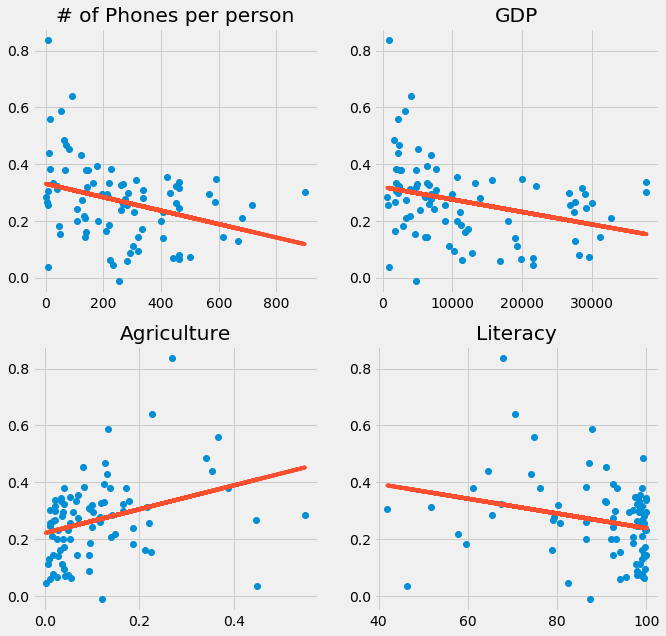

In [11]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
x = Countries.Phones[Countries.Phones>0]
y = Countries.Home_Away_Contrast[Countries.Phones>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('# of Phones per person')

plt.subplot(2,2,2)
x = Countries.GDP[Countries.GDP>0]
y = Countries.Home_Away_Contrast[Countries.GDP>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('GDP')

plt.subplot(2,2,3)
x = Countries.Agriculture[Countries.Agriculture>0]
y = Countries.Home_Away_Contrast[Countries.Agriculture>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('Agriculture')

plt.subplot(2,2,4)
x = Countries.Literacy[Countries.Literacy>0]
y = Countries.Home_Away_Contrast[Countries.Literacy>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('Literacy')

Interestingly enough, it seems that by far the strongest predictors are indicators of general development like number of phones per person, literacy and GDP.

# The more developed the country, the less significant the home advantage (in soccer at least) is!

# Anyone remember Brazil vs Germany in the 2014 WC? Yea Home advantage isn't always a thing!